###  Image Classification and Recognition using PCA and SVM

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

%matplotlib inline

In [3]:
#pip install scikit-image

In [4]:
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [5]:
actor1=os.listdir('chris evans')

In [6]:
actor2=os.listdir('Cillian Murphy')

In [7]:
actor3=os.listdir('tom hiddleson')

###  Reading image as matrix of numbers

In [8]:
limit=10
chris_evans=[None]*limit
j=0
for i in actor1:
    if(j<limit):
        chris_evans[j]=imread('C:/Users/SN124/Machine_Learning(3rd Year)/chris evans/'+i)
        j+=1
    else:
        break

In [9]:
Cillian_Murphy=[None]*limit
j=0
for i in actor2:
    if(j<limit):
        Cillian_Murphy[j]=imread('C:/Users/SN124/Machine_Learning(3rd Year)/Cillian Murphy/'+i)
        j+=1
    else:
        break

In [10]:
tom_hiddleson=[None]*limit
j=0
for i in actor3:
    if(j<limit):
        tom_hiddleson[j]=imread('C:/Users/SN124/Machine_Learning(3rd Year)/tom hiddleson/'+i)
        j+=1
    else:
        break

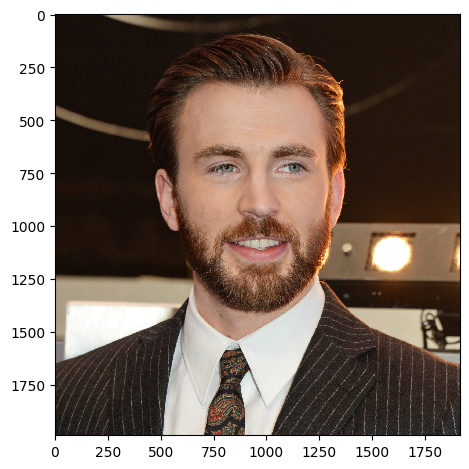

In [11]:
imshow(chris_evans[3])

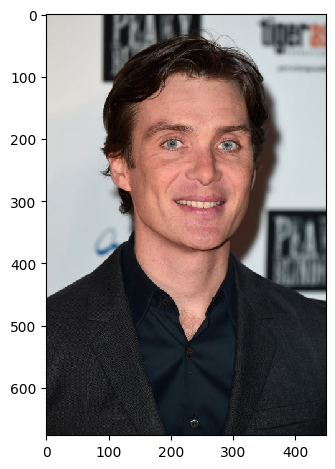

In [12]:
imshow(Cillian_Murphy[8])

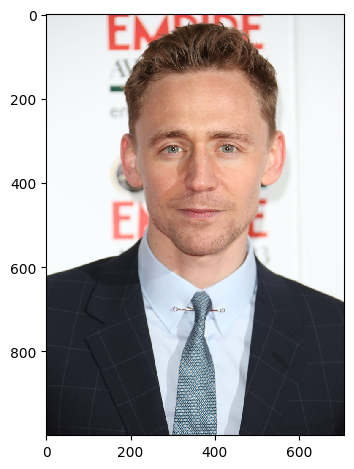

In [13]:
imshow(tom_hiddleson[3])

### Covert into greyscale

In [14]:
chris_grey=[None]*limit
j=0
for i in actor1:
    if(j<limit):
        chris_grey[j]=rgb2gray(chris_evans[j])
        j+=1
    else:
        break

In [15]:
cillian_grey=[None]*limit
j=0
for i in actor2:
    if(j<limit):
        cillian_grey[j]=rgb2gray(Cillian_Murphy[j])
        j+=1
    else:
        break

In [16]:
tom_grey=[None]*limit
j=0
for i in actor3:
    if(j<limit):
        tom_grey[j]=rgb2gray(tom_hiddleson[j])
        j+=1
    else:
        break

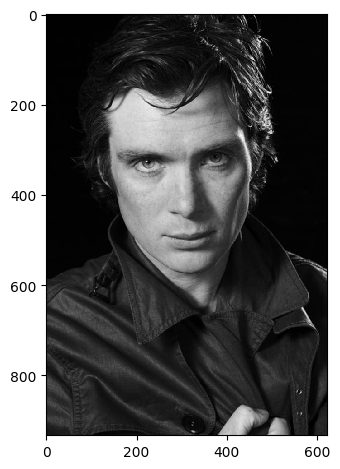

In [17]:
imshow(cillian_grey[4])

###  Matrix Resizing

In [18]:
for j in range(10):
    ce=chris_grey[j]
    chris_grey[j]=resize(ce,(500,500))

In [19]:
for j in range(10):
    cm=cillian_grey[j]
    cillian_grey[j]=resize(cm,(500,500))

In [20]:
for j in range(10):
    th=tom_grey[j]
    tom_grey[j]=resize(th,(500,500))

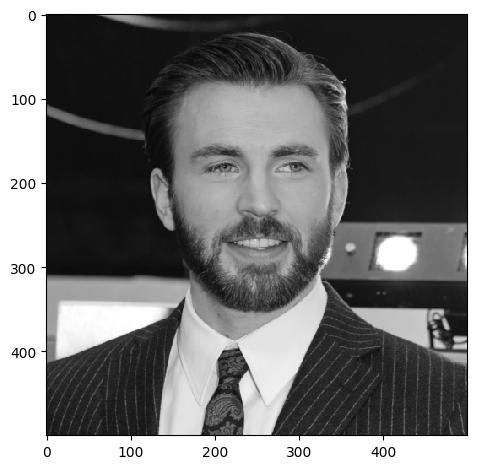

In [21]:
imshow(chris_grey[3])

### Flatten the image

In [22]:
image_size_chris=chris_grey[2].shape
image_size_chris

(500, 500)

In [23]:
image_size_tom=tom_grey[2].shape
image_size_tom

(500, 500)

In [24]:
image_size_cillian=cillian_grey[2].shape
image_size_cillian

(500, 500)

In [25]:
flatten_size_chris=image_size_chris[0]*image_size_chris[1]
flatten_size_chris

250000

In [26]:
flatten_size_cillian=image_size_cillian[0]*image_size_cillian[1]
flatten_size_cillian

250000

In [27]:
flatten_size_tom=image_size_tom[0]*image_size_tom[1]
flatten_size_tom

250000

In [28]:
length_of_images_chris=len(chris_grey)
length_of_images_chris

10

In [29]:
length_of_images_cillian=len(cillian_grey)
length_of_images_cillian

10

In [30]:
length_of_images_tom=len(tom_grey)
length_of_images_tom

10

In [31]:
for i in range(length_of_images_chris):
    chris_grey[i]=np.ndarray.flatten(chris_grey[i]).reshape(flatten_size_chris,1)

In [32]:
for i in range(length_of_images_cillian):
    cillian_grey[i]=np.ndarray.flatten(cillian_grey[i]).reshape(flatten_size_cillian,1)

In [33]:
for i in range(length_of_images_tom):
    tom_grey[i]=np.ndarray.flatten(tom_grey[i]).reshape(flatten_size_tom,1)

### Stack in the array

In [34]:
chris_grey=np.dstack(chris_grey)
chris_grey.shape

(250000, 1, 10)

In [35]:
cillian_grey=np.dstack(cillian_grey)
cillian_grey.shape

(250000, 1, 10)

In [36]:
tom_grey=np.dstack(tom_grey)
tom_grey.shape

(250000, 1, 10)

In [37]:
chris_grey=np.rollaxis(chris_grey,axis=2,start=0)
chris_grey.shape

(10, 250000, 1)

In [38]:
cillian_grey=np.rollaxis(cillian_grey,axis=2,start=0)
cillian_grey.shape

(10, 250000, 1)

In [39]:
tom_grey=np.rollaxis(tom_grey,axis=2,start=0)
tom_grey.shape

(10, 250000, 1)

In [40]:
chris_grey=chris_grey.reshape(length_of_images_chris,flatten_size_chris)
chris_grey.shape

(10, 250000)

In [41]:
cillian_grey=cillian_grey.reshape(length_of_images_cillian,flatten_size_cillian)
cillian_grey.shape

(10, 250000)

In [42]:
tom_grey=tom_grey.reshape(length_of_images_tom,flatten_size_tom)
tom_grey.shape

(10, 250000)

###  Converting into DataFrames


In [43]:
chris_data=pd.DataFrame(chris_grey)
chris_data['label']='Chris Evans'
chris_data

0         1         2         3         4         5         6  \
0  0.626049  0.627514  0.633432  0.631278  0.631367  0.632226  0.635628   
1  0.876071  0.879054  0.882658  0.882658  0.879164  0.878737  0.878737   
2  0.794264  0.794259  0.793086  0.792329  0.794257  0.794262  0.794262   
3  0.063334  0.057039  0.059968  0.056772  0.060053  0.058983  0.064941   
4  0.898440  0.902223  0.910723  0.918854  0.925851  0.929024  0.932893   
5  0.006169  0.004486  0.002247  0.002247  0.002247  0.002247  0.002247   
6  0.454727  0.454385  0.458606  0.439410  0.461433  0.454987  0.436761   
7  0.139386  0.137713  0.137429  0.139912  0.139308  0.138350  0.139607   
8  0.041839  0.045399  0.045476  0.049148  0.049361  0.046529  0.045444   
9  0.556478  0.547040  0.546530  0.551563  0.554658  0.558422  0.559397   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.637289  0.631816  0.631930  ...  0.511626  0.516885  0.519787  0.526950   
1  0.874815  0.874815  0.874815  ...  0.332108  0.328154  0.298608  0.255850   
2  0.794257  0.794257  0.794257  ...  0.068928  0.068234  0.068234  0.068340   
3  0.059644  0.061948  0.061589  ...  0.190632  0.158675  0.151912  0.195266   
4  0.942563  0.942001  0.941254  ...  0.424060  0.418548  0.425429  0.462446   
5  0.002247  0.002247  0.002247  ...  0.196002  0.232171  0.231697  0.196240   
6  0.461882  0.459954  0.439502  ...  0.101863  0.077004  0.030794  0.046482   
7  0.142202  0.142419  0.143582  ...  0.364147  0.365935  0.357181  0.345211   
8  0.045440  0.042703  0.042551  ...  0.005422  0.007296  0.004510  0.008915   
9  0.555901  0.557957  0.556271  ...  0.126900  0.134196  0.144689  0.139675   

     249995    249996    249997    249998    249999        label  
0  0.557146  0.571296  0.572706  0.575158  0.578828  Chris Evans  
1  0.218613  0.155793  0.111067  0.116041  0.110277  Chris Evans  
2  0.066677  0.057964  0.048924  0.041765  0.041124  Chris Evans  
3  0.311505  0.210762  0.187399  0.181391  0.154572  Chris Evans  
4  0.385614  0.409279  0.406263  0.430521  0.436693  Chris Evans  
5  0.150615  0.148168  0.198711  0.221751  0.235197  Chris Evans  
6  0.133409  0.152098  0.113836  0.034892  0.034745  Chris Evans  
7  0.340721  0.343483  0.346067  0.350781  0.356612  Chris Evans  
8  0.006846  0.018291  0.020825  0.028203  0.027334  Chris Evans  
9  0.117759  0.104491  0.119419  0.122784  0.116698  Chris Evans  

[10 rows x 250001 columns]

In [44]:
cillian_data=pd.DataFrame(cillian_grey)
cillian_data['label']='Cillian murphy'
cillian_data

0         1         2         3         4         5         6  \
0  0.266522  0.321471  0.340976  0.369882  0.396007  0.365484  0.363270   
1  0.103973  0.107429  0.109764  0.107941  0.102823  0.102362  0.103846   
2  0.814744  0.817407  0.815872  0.810202  0.799495  0.793215  0.781824   
3  0.128211  0.132019  0.136210  0.134876  0.142439  0.141998  0.136570   
4  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922   
5  0.483358  0.488821  0.486864  0.491653  0.484345  0.487892  0.492892   
6  0.429409  0.427166  0.424682  0.426331  0.430798  0.433656  0.433656   
7  0.617618  0.622264  0.622000  0.618556  0.616847  0.620162  0.627348   
8  0.801086  0.801086  0.801086  0.801086  0.803243  0.805008  0.805008   
9  0.023040  0.034578  0.044976  0.034117  0.022841  0.062460  0.030678   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.398813  0.337107  0.347992  ...  0.296360  0.283485  0.270232  0.299047   
1  0.109804  0.113163  0.122016  ...  0.153520  0.153139  0.141895  0.147636   
2  0.764216  0.752748  0.738419  ...  0.153771  0.151688  0.182315  0.165674   
3  0.132511  0.140459  0.136611  ...  0.074360  0.070760  0.074654  0.078532   
4  0.003922  0.003922  0.003922  ...  0.149942  0.150193  0.156652  0.163820   
5  0.496017  0.491497  0.495262  ...  0.110605  0.109884  0.121033  0.108656   
6  0.433656  0.433529  0.429796  ...  0.021911  0.027754  0.026007  0.010499   
7  0.624905  0.608012  0.595816  ...  0.071215  0.067314  0.063608  0.063608   
8  0.805008  0.804420  0.801086  ...  0.061648  0.055766  0.048707  0.048119   
9  0.039449  0.047246  0.036968  ...  0.097755  0.088060  0.091220  0.112215   

     249995    249996    249997    249998    249999           label  
0  0.283069  0.285067  0.306611  0.281741  0.296141  Cillian murphy  
1  0.162024  0.138284  0.147824  0.114070  0.655009  Cillian murphy  
2  0.139408  0.176766  0.186880  0.189964  0.217534  Cillian murphy  
3  0.081910  0.073512  0.079759  0.078383  0.079143  Cillian murphy  
4  0.165075  0.164819  0.163262  0.163198  0.165001  Cillian murphy  
5  0.114600  0.111864  0.105381  0.103662  0.103491  Cillian murphy  
6  0.035484  0.013378  0.017661  0.013669  0.018715  Cillian murphy  
7  0.064932  0.066667  0.068762  0.069725  0.069725  Cillian murphy  
8  0.056942  0.071060  0.081216  0.083447  0.095996  Cillian murphy  
9  0.090290  0.098654  0.111378  0.121743  0.104834  Cillian murphy  

[10 rows x 250001 columns]

In [45]:
tom_data=pd.DataFrame(tom_grey)
tom_data['label']='Tom hiddleson'
tom_data

0         1         2         3         4         5         6  \
0  0.872693  0.863636  0.855895  0.852699  0.845360  0.830509  0.819480   
1  0.348561  0.348857  0.352086  0.351752  0.350382  0.350382  0.351665   
2  0.654427  0.653738  0.656067  0.655726  0.653983  0.656052  0.654312   
3  0.899476  0.899476  0.899476  0.899476  0.899476  0.899476  0.899476   
4  0.372597  0.374419  0.376956  0.380351  0.382984  0.387533  0.389632   
5  0.418593  0.419651  0.417627  0.415924  0.418011  0.415389  0.413643   
6  0.094683  0.094683  0.094683  0.094683  0.094683  0.093912  0.093111   
7  0.030588  0.027451  0.023529  0.017255  0.012392  0.007059  0.003922   
8  0.598702  0.594668  0.591004  0.597443  0.600512  0.596110  0.599481   
9  0.432493  0.431779  0.437102  0.435871  0.425222  0.429692  0.441093   

              7         8             9  ...    249991    249992    249993  \
0  8.093244e-01  0.791958  7.769473e-01  ...  0.175066  0.166106  0.171958   
1  3.525931e-01  0.350778  3.493458e-01  ...  0.004299  0.002213  0.000565   
2  6.508429e-01  0.652523  6.523411e-01  ...  0.090577  0.082094  0.082480   
3  8.995014e-01  0.899686  9.032191e-01  ...  0.063786  0.058091  0.055916   
4  3.904393e-01  0.392113  3.957171e-01  ...  0.013136  0.020226  0.061611   
5  4.119463e-01  0.414436  4.114908e-01  ...  0.081581  0.086404  0.078879   
6  9.252828e-02  0.090817  9.076157e-02  ...  0.556320  0.500373  0.502936   
7  1.461422e-08  0.000000  1.169137e-08  ...  0.207909  0.192850  0.188301   
8  5.999448e-01  0.606253  6.032222e-01  ...  0.006535  0.016643  0.049775   
9  4.112007e-01  0.418389  4.364721e-01  ...  0.000000  0.000000  0.000000   

     249994    249995    249996    249997    249998    249999          label  
0  0.168298  0.166268  0.164716  0.164598  0.176354  0.172001  Tom hiddleson  
1  0.003005  0.007024  0.007343  0.004488  0.001507  0.001273  Tom hiddleson  
2  0.082850  0.081395  0.082953  0.089306  0.090483  0.085490  Tom hiddleson  
3  0.058553  0.064708  0.088039  0.092430  0.082927  0.083586  Tom hiddleson  
4  0.093493  0.019671  0.020050  0.108056  0.151462  0.029781  Tom hiddleson  
5  0.076016  0.071915  0.074363  0.078644  0.080868  0.073711  Tom hiddleson  
6  0.442616  0.374588  0.432954  0.425807  0.429361  0.448987  Tom hiddleson  
7  0.189713  0.188144  0.201007  0.213242  0.188458  0.185791  Tom hiddleson  
8  0.083341  0.100536  0.133512  0.133053  0.138937  0.159295  Tom hiddleson  
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  Tom hiddleson  

[10 rows x 250001 columns]

###  DataFrame Concatination

In [46]:
actor_1=pd.concat([chris_data,cillian_data])

In [47]:
actor=pd.concat([tom_data,actor_1])
actor

0         1         2         3         4         5         6  \
0  0.872693  0.863636  0.855895  0.852699  0.845360  0.830509  0.819480   
1  0.348561  0.348857  0.352086  0.351752  0.350382  0.350382  0.351665   
2  0.654427  0.653738  0.656067  0.655726  0.653983  0.656052  0.654312   
3  0.899476  0.899476  0.899476  0.899476  0.899476  0.899476  0.899476   
4  0.372597  0.374419  0.376956  0.380351  0.382984  0.387533  0.389632   
5  0.418593  0.419651  0.417627  0.415924  0.418011  0.415389  0.413643   
6  0.094683  0.094683  0.094683  0.094683  0.094683  0.093912  0.093111   
7  0.030588  0.027451  0.023529  0.017255  0.012392  0.007059  0.003922   
8  0.598702  0.594668  0.591004  0.597443  0.600512  0.596110  0.599481   
9  0.432493  0.431779  0.437102  0.435871  0.425222  0.429692  0.441093   
0  0.626049  0.627514  0.633432  0.631278  0.631367  0.632226  0.635628   
1  0.876071  0.879054  0.882658  0.882658  0.879164  0.878737  0.878737   
2  0.794264  0.794259  0.793086  0.792329  0.794257  0.794262  0.794262   
3  0.063334  0.057039  0.059968  0.056772  0.060053  0.058983  0.064941   
4  0.898440  0.902223  0.910723  0.918854  0.925851  0.929024  0.932893   
5  0.006169  0.004486  0.002247  0.002247  0.002247  0.002247  0.002247   
6  0.454727  0.454385  0.458606  0.439410  0.461433  0.454987  0.436761   
7  0.139386  0.137713  0.137429  0.139912  0.139308  0.138350  0.139607   
8  0.041839  0.045399  0.045476  0.049148  0.049361  0.046529  0.045444   
9  0.556478  0.547040  0.546530  0.551563  0.554658  0.558422  0.559397   
0  0.266522  0.321471  0.340976  0.369882  0.396007  0.365484  0.363270   
1  0.103973  0.107429  0.109764  0.107941  0.102823  0.102362  0.103846   
2  0.814744  0.817407  0.815872  0.810202  0.799495  0.793215  0.781824   
3  0.128211  0.132019  0.136210  0.134876  0.142439  0.141998  0.136570   
4  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922   
5  0.483358  0.488821  0.486864  0.491653  0.484345  0.487892  0.492892   
6  0.429409  0.427166  0.424682  0.426331  0.430798  0.433656  0.433656   
7  0.617618  0.622264  0.622000  0.618556  0.616847  0.620162  0.627348   
8  0.801086  0.801086  0.801086  0.801086  0.803243  0.805008  0.805008   
9  0.023040  0.034578  0.044976  0.034117  0.022841  0.062460  0.030678   

              7         8             9  ...    249991    249992    249993  \
0  8.093244e-01  0.791958  7.769473e-01  ...  0.175066  0.166106  0.171958   
1  3.525931e-01  0.350778  3.493458e-01  ...  0.004299  0.002213  0.000565   
2  6.508429e-01  0.652523  6.523411e-01  ...  0.090577  0.082094  0.082480   
3  8.995014e-01  0.899686  9.032191e-01  ...  0.063786  0.058091  0.055916   
4  3.904393e-01  0.392113  3.957171e-01  ...  0.013136  0.020226  0.061611   
5  4.119463e-01  0.414436  4.114908e-01  ...  0.081581  0.086404  0.078879   
6  9.252828e-02  0.090817  9.076157e-02  ...  0.556320  0.500373  0.502936   
7  1.461422e-08  0.000000  1.169137e-08  ...  0.207909  0.192850  0.188301   
8  5.999448e-01  0.606253  6.032222e-01  ...  0.006535  0.016643  0.049775   
9  4.112007e-01  0.418389  4.364721e-01  ...  0.000000  0.000000  0.000000   
0  6.372891e-01  0.631816  6.319303e-01  ...  0.511626  0.516885  0.519787   
1  8.748155e-01  0.874815  8.748153e-01  ...  0.332108  0.328154  0.298608   
2  7.942572e-01  0.794257  7.942566e-01  ...  0.068928  0.068234  0.068234   
3  5.964400e-02  0.061948  6.158907e-02  ...  0.190632  0.158675  0.151912   
4  9.425625e-01  0.942001  9.412536e-01  ...  0.424060  0.418548  0.425429   
5  2.247059e-03  0.002247  2.247059e-03  ...  0.196002  0.232171  0.231697   
6  4.618819e-01  0.459954  4.395022e-01  ...  0.101863  0.077004  0.030794   
7  1.422022e-01  0.142419  1.435824e-01  ...  0.364147  0.365935  0.357181   
8  4.544005e-02  0.042703  4.255064e-02  ...  0.005422  0.007296  0.004510   
9  5.559013e-01  0.557957  5.562710e-01  ...  0.126900  0.134196  0.144689   
0  3.988134e-01  0.337107  3.479923e-01  ...  

In [48]:
from sklearn.utils import shuffle

In [49]:
hollywood_indexed=shuffle(actor).reset_index()
hollywood_indexed

index         0         1         2         3         4         5  \
0       0  0.872693  0.863636  0.855895  0.852699  0.845360  0.830509   
1       8  0.598702  0.594668  0.591004  0.597443  0.600512  0.596110   
2       3  0.063334  0.057039  0.059968  0.056772  0.060053  0.058983   
3       6  0.429409  0.427166  0.424682  0.426331  0.430798  0.433656   
4       0  0.626049  0.627514  0.633432  0.631278  0.631367  0.632226   
5       2  0.794264  0.794259  0.793086  0.792329  0.794257  0.794262   
6       7  0.617618  0.622264  0.622000  0.618556  0.616847  0.620162   
7       5  0.006169  0.004486  0.002247  0.002247  0.002247  0.002247   
8       7  0.030588  0.027451  0.023529  0.017255  0.012392  0.007059   
9       4  0.372597  0.374419  0.376956  0.380351  0.382984  0.387533   
10      9  0.023040  0.034578  0.044976  0.034117  0.022841  0.062460   
11      7  0.139386  0.137713  0.137429  0.139912  0.139308  0.138350   
12      1  0.103973  0.107429  0.109764  0.107941  0.102823  0.102362   
13      6  0.094683  0.094683  0.094683  0.094683  0.094683  0.093912   
14      8  0.801086  0.801086  0.801086  0.801086  0.803243  0.805008   
15      2  0.654427  0.653738  0.656067  0.655726  0.653983  0.656052   
16      3  0.128211  0.132019  0.136210  0.134876  0.142439  0.141998   
17      5  0.418593  0.419651  0.417627  0.415924  0.418011  0.415389   
18      2  0.814744  0.817407  0.815872  0.810202  0.799495  0.793215   
19      4  0.898440  0.902223  0.910723  0.918854  0.925851  0.929024   
20      1  0.348561  0.348857  0.352086  0.351752  0.350382  0.350382   
21      5  0.483358  0.488821  0.486864  0.491653  0.484345  0.487892   
22      6  0.454727  0.454385  0.458606  0.439410  0.461433  0.454987   
23      0  0.266522  0.321471  0.340976  0.369882  0.396007  0.365484   
24      9  0.556478  0.547040  0.546530  0.551563  0.554658  0.558422   
25      4  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922   
26      9  0.432493  0.431779  0.437102  0.435871  0.425222  0.429692   
27      1  0.876071  0.879054  0.882658  0.882658  0.879164  0.878737   
28      8  0.041839  0.045399  0.045476  0.049148  0.049361  0.046529   
29      3  0.899476  0.899476  0.899476  0.899476  0.899476  0.899476   

           6             7         8  ...    249991    249992    249993  \
0   0.819480  8.093244e-01  0.791958  ...  0.175066  0.166106  0.171958   
1   0.599481  5.999448e-01  0.606253  ...  0.006535  0.016643  0.049775   
2   0.064941  5.964400e-02  0.061948  ...  0.190632  0.158675  0.151912   
3   0.433656  4.336562e-01  0.433529  ...  0.021911  0.027754  0.026007   
4   0.635628  6.372891e-01  0.631816  ...  0.511626  0.516885  0.519787   
5   0.794262  7.942572e-01  0.794257  ...  0.068928  0.068234  0.068234   
6   0.627348  6.249055e-01  0.608012  ...  0.071215  0.067314  0.063608   
7   0.002247  2.247059e-03  0.002247  ...  0.196002  0.232171  0.231697   
8   0.003922  1.461422e-08  0.000000  ...  0.207909  0.192850  0.188301   
9   0.389632  3.904393e-01  0.392113  ...  0.013136  0.020226  0.061611   
10  0.030678  3.944941e-02  0.047246  ...  0.097755  0.088060  0.091220   
11  0.139607  1.422022e-01  0.142419  ...  0.364147  0.365935  0.357181   
12  0.103846  1.098042e-01  0.113163  ...  0.153520  0.153139  0.141895   
13  0.093111  9.252828e-02  0.090817  ...  0.556320  0.500373  0.502936   
14  0.805008  8.050078e-01  0.804420  ...  0.061648  0.055766  0.048707   
15  0.654312  6.508429e-01  0.652523  ...  0.090577  0.082094  0.082480   
16  0.136570  1.325110e-01  0.140459  ...  0.074360  0.070760  0.074654   
17  0.413643  4.119463e-01  0.414436  ...  0.081581  0.086404  0.078879   
18  0.781824  7.642164e-01  0.752748  ...  0.153771  0.151688  0.182315   
19  0.932893  9.425625e-01  0.942001  ...  0.424060  0.418548  0.425429   
20  0.351665  3.525931e-01  0.350778  ...  0.004299  0.002213  0.000565   
21  0.492892  4.960172e-01  0.491497  ...  0.110605  0.109884  0.121033   
22  0.436761  4

In [50]:
hollywood_indexed=hollywood_indexed.drop(['index'],axis=1)
hollywood_indexed

0         1         2         3         4         5         6  \
0   0.872693  0.863636  0.855895  0.852699  0.845360  0.830509  0.819480   
1   0.598702  0.594668  0.591004  0.597443  0.600512  0.596110  0.599481   
2   0.063334  0.057039  0.059968  0.056772  0.060053  0.058983  0.064941   
3   0.429409  0.427166  0.424682  0.426331  0.430798  0.433656  0.433656   
4   0.626049  0.627514  0.633432  0.631278  0.631367  0.632226  0.635628   
5   0.794264  0.794259  0.793086  0.792329  0.794257  0.794262  0.794262   
6   0.617618  0.622264  0.622000  0.618556  0.616847  0.620162  0.627348   
7   0.006169  0.004486  0.002247  0.002247  0.002247  0.002247  0.002247   
8   0.030588  0.027451  0.023529  0.017255  0.012392  0.007059  0.003922   
9   0.372597  0.374419  0.376956  0.380351  0.382984  0.387533  0.389632   
10  0.023040  0.034578  0.044976  0.034117  0.022841  0.062460  0.030678   
11  0.139386  0.137713  0.137429  0.139912  0.139308  0.138350  0.139607   
12  0.103973  0.107429  0.109764  0.107941  0.102823  0.102362  0.103846   
13  0.094683  0.094683  0.094683  0.094683  0.094683  0.093912  0.093111   
14  0.801086  0.801086  0.801086  0.801086  0.803243  0.805008  0.805008   
15  0.654427  0.653738  0.656067  0.655726  0.653983  0.656052  0.654312   
16  0.128211  0.132019  0.136210  0.134876  0.142439  0.141998  0.136570   
17  0.418593  0.419651  0.417627  0.415924  0.418011  0.415389  0.413643   
18  0.814744  0.817407  0.815872  0.810202  0.799495  0.793215  0.781824   
19  0.898440  0.902223  0.910723  0.918854  0.925851  0.929024  0.932893   
20  0.348561  0.348857  0.352086  0.351752  0.350382  0.350382  0.351665   
21  0.483358  0.488821  0.486864  0.491653  0.484345  0.487892  0.492892   
22  0.454727  0.454385  0.458606  0.439410  0.461433  0.454987  0.436761   
23  0.266522  0.321471  0.340976  0.369882  0.396007  0.365484  0.363270   
24  0.556478  0.547040  0.546530  0.551563  0.554658  0.558422  0.559397   
25  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922   
26  0.432493  0.431779  0.437102  0.435871  0.425222  0.429692  0.441093   
27  0.876071  0.879054  0.882658  0.882658  0.879164  0.878737  0.878737   
28  0.041839  0.045399  0.045476  0.049148  0.049361  0.046529  0.045444   
29  0.899476  0.899476  0.899476  0.899476  0.899476  0.899476  0.899476   

               7         8             9  ...    249991    249992    249993  \
0   8.093244e-01  0.791958  7.769473e-01  ...  0.175066  0.166106  0.171958   
1   5.999448e-01  0.606253  6.032222e-01  ...  0.006535  0.016643  0.049775   
2   5.964400e-02  0.061948  6.158907e-02  ...  0.190632  0.158675  0.151912   
3   4.336562e-01  0.433529  4.297963e-01  ...  0.021911  0.027754  0.026007   
4   6.372891e-01  0.631816  6.319303e-01  ...  0.511626  0.516885  0.519787   
5   7.942572e-01  0.794257  7.942566e-01  ...  0.068928  0.068234  0.068234   
6   6.249055e-01  0.608012  5.958157e-01  ...  0.071215  0.067314  0.063608   
7   2.247059e-03  0.002247  2.247059e-03  ...  0.196002  0.232171  0.231697   
8   1.461422e-08  0.000000  1.169137e-08  ...  0.207909  0.192850  0.188301   
9   3.904393e-01  0.392113  3.957171e-01  ...  0.013136  0.020226  0.061611   
10  3.944941e-02  0.047246  3.696815e-02  ...  0.097755  0.088060  0.091220   
11  1.422022e-01  0.142419  1.435824e-01  ...  0.364147  0.365935  0.357181   
12  1.098042e-01  0.113163  1.220156e-01  ...  0.153520  0.153139  0.141895   
13  9.252828e-02  0.090817  9.076157e-02  ...  0.556320  0.500373  0.502936   
14  8.050078e-01  0.804420  8.010863e-01  ...  0.061648  0.055766  0.048707   
15  6.508429e-01  0.652523  6.523411e-01  ...  0.090577  0.082094  0.082480   
16  1.325110e-01  0.140459  1.366110e-01  ...  0.074360  0.070760  0.074654   
17  4.119463e-01  0.414436  4.114908e-01  ...  0.081581  0.086404  0.078879   
18  7.642164e-01  0.752748  7.384185e-01  ...  0.153771  0.151688  0.182315   
19  9.425625e-01  0.942001  9.412536e-01  ...  0.424060  0.418548  0.42542

In [51]:
hollywood_indexed.to_csv('Actors.csv')

In [52]:
x=hollywood_indexed.values[:,:-1]

In [53]:
y=hollywood_indexed.values[:,-1]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [56]:
x_train.shape

(15, 250000)

In [57]:
x_test.shape

(15, 250000)

In [58]:
y_train.shape

(15,)

In [59]:
y_test.shape

(15,)

In [60]:
from sklearn import decomposition

In [61]:
pca=decomposition.PCA(n_components=15,whiten=True,random_state=1)

In [62]:
pca.fit(x_train)

PCA(n_components=15, random_state=1, whiten=True)

In [63]:
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

In [64]:
x_train_pca.shape

(15, 15)

In [65]:
x_test_pca.shape

(15, 15)

In [66]:
eigen=(np.reshape(x[10],(500,500)).astype(np.float64))

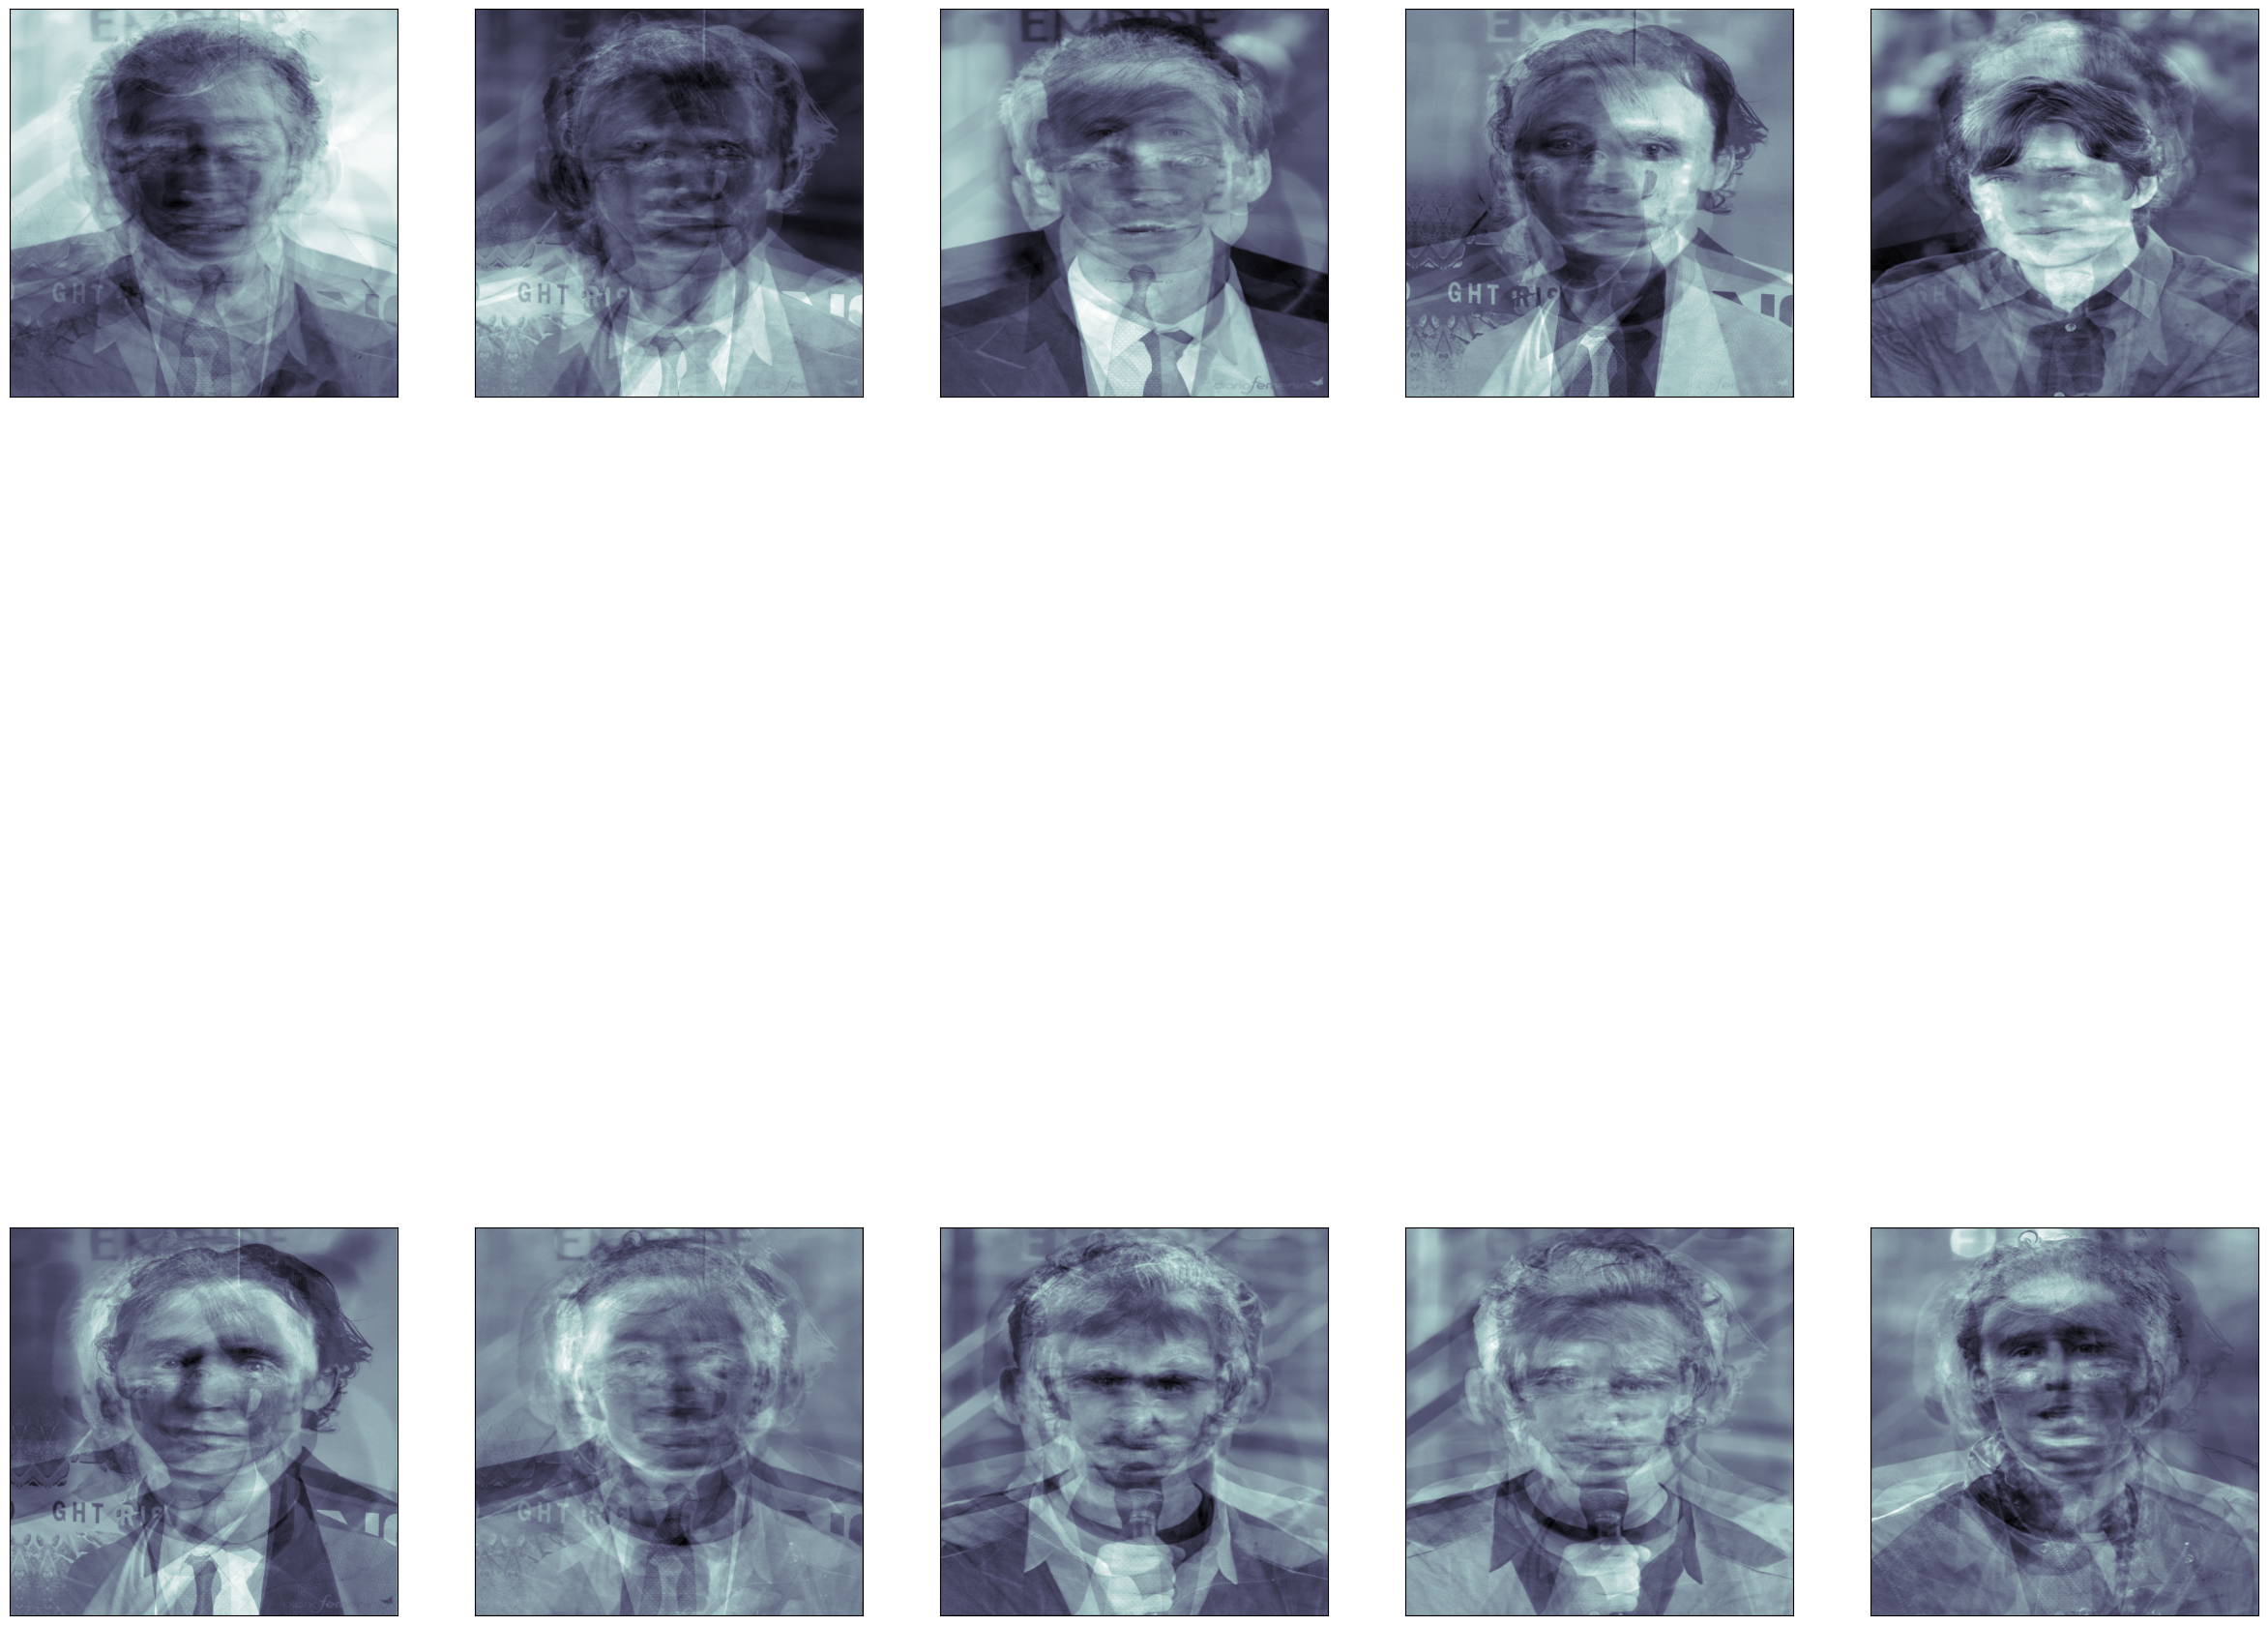

In [67]:
fig=py.figure(figsize=(30,30))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape),cmap=py.cm.bone)

In [68]:
from sklearn import svm

In [69]:
clf=svm.SVC(C=2,gamma=0.006,kernel='rbf')
clf.fit(x_train_pca,y_train)

SVC(C=2, gamma=0.006)